In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split

In [218]:
train_cleaned = pd.read_csv("./data/train_cleaned.csv")

## eq1에 대해

In [219]:
eq1_df = train_cleaned[
    (train_cleaned['Equipment_Dam'] == 'Dam dispenser #1') &
    (train_cleaned['Equipment_Fill1'] == 'Fill1 dispenser #1') &
    (train_cleaned['Equipment_Fill2'] == 'Fill2 dispenser #1')
]

# 삭제할 열 리스트 - 범주형 변수 삭제(Production Qty는 혹시 모르니까 남겨둠)
columns_to_drop = [
    'Model.Suffix', 
    'Equipment_Dam', 
    'Chamber Temp. Judge Value_AutoClave', 
    'Equipment_Fill1', 
    'Equipment_Fill2'
]

# 열 삭제
eq1_df = eq1_df.drop(columns=columns_to_drop)

In [220]:
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
constant_columns = {col: eq1_df[col].iloc[0] for col in eq1_df.columns if eq1_df[col].nunique() == 1}

# 데이터 프레임에서 해당 열 삭제
eq1_df = eq1_df.drop(columns=constant_columns.keys())

# 삭제된 열의 개수 출력
print(f"삭제된 열의 개수: {len(constant_columns)}")

# 삭제된 열과 그 값을 한 줄에 하나씩 출력
print("삭제된 열과 값:")
for col, value in constant_columns.items():
    print(f"{col}: {value}")

eq1_df

삭제된 열의 개수: 10
삭제된 열과 값:
CURE END POSITION X Collect Result_Dam: 240.0
CURE END POSITION Z Collect Result_Dam: 2.5
CURE START POSITION X Collect Result_Dam: 1030
CURE START POSITION Θ Collect Result_Dam: -90
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2: 835.5
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2: 458.0
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2: 156.0
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2: 428.0
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2: 427.9
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2: 243.7


,CURE SPEED Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam,...,CURE END POSITION Z Collect Result_Fill2,CURE SPEED Collect Result_Fill2,CURE START POSITION X Collect Result_Fill2,CURE START POSITION Z Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,target
0,100,16,14.9,8.4,14.7,1.04,0.58,1.02,550.5,464.3,...,33,48,1020,33,114.612,19.9,7.0,127,1,Normal
2,70,16,13.2,6.5,13.2,0.92,0.45,0.92,550.4,463.7,...,33,50,1020,33,85.000,19.7,8.0,483,1,Normal
8,70,16,14.2,8.1,14.3,0.99,0.56,1.00,550.6,463.9,...,33,50,1020,33,85.000,19.4,3.0,77,6,AbNormal
9,70,16,13.2,6.6,13.1,1.45,0.72,1.44,551.5,465.0,...,33,50,1020,33,85.000,20.2,5.0,185,1,Normal
10,70,16,13.6,8.1,13.6,0.95,0.56,0.95,550.6,463.9,...,33,50,1020,33,85.000,19.8,5.0,225,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40500,70,10,9.6,4.9,9.7,0.67,0.34,0.67,549.0,463.0,...,32,50,1020,32,85.000,19.2,1.0,252,1,AbNormal
40501,70,10,9.7,4.9,9.7,0.67,0.34,0.67,549.0,462.5,...,32,50,1020,33,85.000,19.6,2.0,56,1,Normal
40502,70,10,9.7,4.9,9.6,0.67,0.34,0.67,549.0,462.5,...,32,50,1020,33,85.000,19.3,8.0,329,1,Normal
40503,70,10,17.0,5.0,17.0,1.19,0.35,1.19,550.3,463.8,...,33,50,1020,33,85.000,19.2,1.0,318,1,Normal


C:\Users\my pc\AppData\Local\Temp\ipykernel_21564\4188458091.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


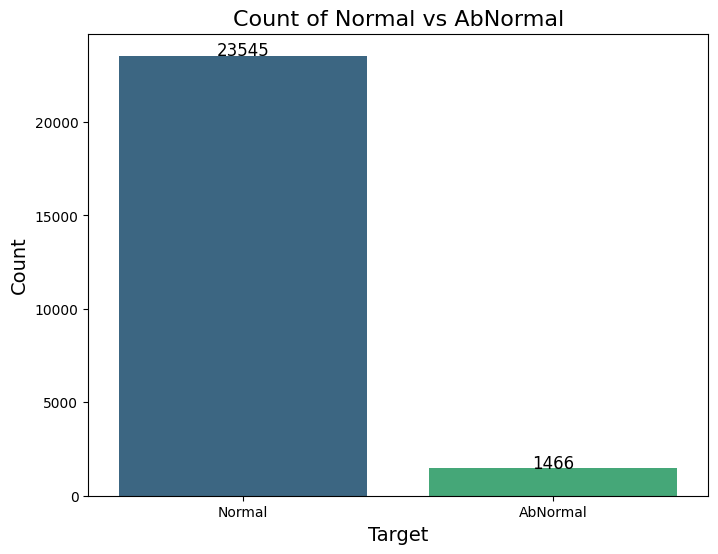

In [221]:
# 'target' 열의 값별 개수 계산
target_counts = eq1_df['target'].value_counts()

# 막대그래프 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')

# 그래프 제목과 축 라벨 설정
plt.title('Count of Normal vs AbNormal', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 각 막대 위에 개수 표시
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 3, str(v), ha='center', fontsize=12)

plt.show()

In [222]:
# 데이터프레임의 각 열에 대해 고유한 값들을 오름차순으로 정렬하여 출력
for column in eq1_df.columns:
    unique_values = sorted(eq1_df[column].unique())
    print(f"'{column}' 열의 고유 값들 (오름차순): {unique_values}\n")

'CURE SPEED Collect Result_Dam' 열의 고유 값들 (오름차순): [70, 85, 95, 100, 105]

'DISCHARGED SPEED OF RESIN Collect Result_Dam' 열의 고유 값들 (오름차순): [10, 16]

'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam' 열의 고유 값들 (오름차순): [9.6, 9.7, 11.6, 13.1, 13.2, 13.5, 13.6, 13.7, 13.8, 14.2, 14.3, 14.7, 14.8, 14.9, 17.0, 17.1, 21.2, 21.3]

'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam' 열의 고유 값들 (오름차순): [3.8, 3.9, 4.0, 4.8, 4.9, 5.0, 5.4, 5.5, 6.5, 6.6, 7.5, 7.6, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 10.5, 10.6]

'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam' 열의 고유 값들 (오름차순): [9.6, 9.7, 9.8, 11.5, 11.6, 13.1, 13.2, 13.5, 13.6, 13.7, 13.8, 14.2, 14.3, 14.7, 14.8, 17.0, 17.1, 21.2, 21.3]

'Dispense Volume(Stage1) Collect Result_Dam' 열의 고유 값들 (오름차순): [0.67, 0.81, 0.91, 0.92, 0.94, 0.95, 0.96, 0.99, 1.0, 1.02, 1.03, 1.04, 1.19, 1.44, 1.45, 1.48, 1.49, 1.56, 1.61, 1.62, 1.63, 2.34]

'Dispense Volume(Stage2) Collect Result_Dam' 열의 고유 값들 (오름차순): [0.26, 0.27, 0.28, 0.33, 0.34, 0.35, 0.37, 0.38, 0.45

c:\Users\my pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\my pc\AppData\Local\Temp\ipykernel_21564\1571740695.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnormal_data['Cluster'] = kmeans.fit_predict(X_scaled)


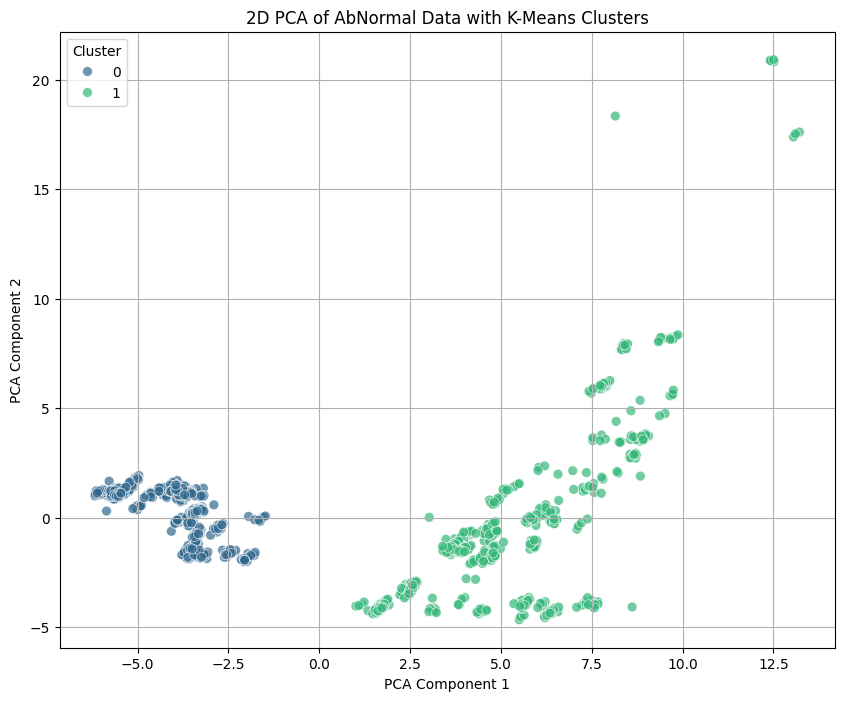

In [223]:
# 'AbNormal'인 데이터만 필터링
abnormal_data = eq1_df[eq1_df['target'] == 'AbNormal']

# 'target' 열을 제외한 나머지 열들만 선택
X = abnormal_data.drop('target', axis=1)

# 데이터 전처리 (스케일링)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA를 사용하여 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 최적의 군집 개수 찾기 (엘보우 방법)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
abnormal_data['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA 결과를 데이터프레임에 추가
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = abnormal_data['Cluster'].values

# 2차원 플롯으로 군집 결과 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50, alpha=0.7)
plt.title('2D PCA of AbNormal Data with K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [224]:
from itertools import combinations
from collections import defaultdict

# 동일한 값을 가지는 열 쌍을 저장할 리스트
equal_columns = []

# 열 이름들의 모든 쌍을 생성하여 비교
for col1, col2 in combinations(eq1_df.columns, 2):
    if eq1_df[col1].equals(eq1_df[col2]):
        equal_columns.append((col1, col2))

# 열 쌍을 그룹화하여 저장할 딕셔너리
grouped_columns = defaultdict(set)

# 열 쌍을 그룹화
for col1, col2 in equal_columns:
    grouped_columns[col1].add(col2)
    grouped_columns[col2].add(col1)

# 방문한 열을 추적할 집합
visited = set()

# 그룹화된 열 쌍 출력
print("같은 값을 가지는 열 그룹:")
for col, group in grouped_columns.items():
    if col not in visited:
        # 현재 열과 연결된 모든 열을 그룹으로 묶기
        group.add(col)
        visited.update(group)
        print(f"그룹: {', '.join(group)}")

같은 값을 가지는 열 그룹:
그룹: HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1, HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1, HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1
그룹: Receip No Collect Result_Fill1, Receip No Collect Result_Fill2


### Receip No Collect Result 조사

In [225]:
# 세 열 중 하나라도 다른 경우를 필터링
one_or_more_different_rows = eq1_df[
    (eq1_df['Receip No Collect Result_Dam'] != eq1_df['Receip No Collect Result_Fill1']) |
    (eq1_df['Receip No Collect Result_Dam'] != eq1_df['Receip No Collect Result_Fill2']) |
    (eq1_df['Receip No Collect Result_Fill1'] != eq1_df['Receip No Collect Result_Fill2'])
]

# 조건을 만족하는 행의 수 계산
count_one_or_more_different = len(one_or_more_different_rows)

# 'target' 열의 값 추출
target_values = one_or_more_different_rows['target']

# 결과 출력
print(f"Receip No Collect Result_Dam, Receip No Collect Result_Fill1, Receip No Collect Result_Fill2 중 하나라도 다른 값이 있는 행의 수: {count_one_or_more_different}")
print("\nReceip No Collect Result_Dam, Receip No Collect Result_Fill1, Receip No Collect Result_Fill2 중 하나라도 다른 값이 있는 행의 'target' 값들:")
print(target_values.value_counts())

# 조건을 만족하는 데이터의 행 번호 추출
row_indices = one_or_more_different_rows.index.tolist()

# 행 번호 출력
print("\n조건을 만족하는 데이터의 행 번호:")
print(row_indices)

Receip No Collect Result_Dam, Receip No Collect Result_Fill1, Receip No Collect Result_Fill2 중 하나라도 다른 값이 있는 행의 수: 1

Receip No Collect Result_Dam, Receip No Collect Result_Fill1, Receip No Collect Result_Fill2 중 하나라도 다른 값이 있는 행의 'target' 값들:
target
AbNormal    1
Name: count, dtype: int64

조건을 만족하는 데이터의 행 번호:
[22453]


### Production Qty Collect Result 조사

In [226]:
# 세 열 중 하나라도 다른 경우를 필터링
one_or_more_different_rows = eq1_df[
    (eq1_df['Production Qty Collect Result_Dam'] != eq1_df['Production Qty Collect Result_Fill1']) |
    (eq1_df['Production Qty Collect Result_Dam'] != eq1_df['Production Qty Collect Result_Fill2']) |
    (eq1_df['Production Qty Collect Result_Fill1'] != eq1_df['Production Qty Collect Result_Fill2'])
]

# 조건을 만족하는 행의 수 계산
count_one_or_more_different = len(one_or_more_different_rows)

# 'target' 열의 값 추출
target_values = one_or_more_different_rows['target']

# 결과 출력
print(f"Production Qty Collect Result_Dam, Production Qty Collect Result_Fill1, Production Qty Collect Result_Fill2 중 하나라도 다른 값이 있는 행의 수: {count_one_or_more_different}")
print("\nProduction Qty Collect Result_Dam, Production Qty Collect Result_Fill1, Production Qty Collect Result_Fill2 중 하나라도 다른 값이 있는 행의 'target' 값들:")
print(target_values.value_counts())

# 조건을 만족하는 데이터의 행 번호 추출
row_indices = one_or_more_different_rows.index.tolist()

# 행 번호 출력
print("\n조건을 만족하는 데이터의 행 번호:")
print(row_indices)

Production Qty Collect Result_Dam, Production Qty Collect Result_Fill1, Production Qty Collect Result_Fill2 중 하나라도 다른 값이 있는 행의 수: 42

Production Qty Collect Result_Dam, Production Qty Collect Result_Fill1, Production Qty Collect Result_Fill2 중 하나라도 다른 값이 있는 행의 'target' 값들:
target
AbNormal    42
Name: count, dtype: int64

조건을 만족하는 데이터의 행 번호:
[649, 1268, 1651, 6116, 11287, 12461, 12712, 12976, 13263, 14792, 16363, 21723, 22508, 24807, 25098, 25179, 26725, 26744, 27283, 27554, 28302, 28497, 29231, 29327, 29336, 31198, 31299, 31400, 31687, 32229, 32942, 32956, 33000, 33794, 35182, 37641, 37942, 38091, 38484, 38888, 39640, 39783]


### PalletID Collect Result 조사

In [227]:
# 세 열 중 하나라도 다른 경우를 필터링
one_or_more_different_rows = eq1_df[
    (eq1_df['PalletID Collect Result_Dam'] != eq1_df['PalletID Collect Result_Fill1']) |
    (eq1_df['PalletID Collect Result_Dam'] != eq1_df['PalletID Collect Result_Fill2']) |
    (eq1_df['PalletID Collect Result_Fill1'] != eq1_df['PalletID Collect Result_Fill2'])
]

# 조건을 만족하는 행의 수 계산
count_one_or_more_different = len(one_or_more_different_rows)

# 'target' 열의 값 추출
target_values = one_or_more_different_rows['target']

# 결과 출력
print(f"PalletID Collect Result_Dam, PalletID Collect Result_Fill1, PalletID Collect Result_Fill2 중 하나라도 다른 값이 있는 행의 수: {count_one_or_more_different}")
print("\nPalletID Collect Result_Dam, PalletID Collect Result_Fill1, PalletID Collect Result_Fill2 중 하나라도 다른 값이 있는 행의 'target' 값들:")
print(target_values.value_counts())

# 조건을 만족하는 데이터의 행 번호 추출
row_indices = one_or_more_different_rows.index.tolist()

# 행 번호 출력
print("\n조건을 만족하는 데이터의 행 번호:")
print(row_indices)

PalletID Collect Result_Dam, PalletID Collect Result_Fill1, PalletID Collect Result_Fill2 중 하나라도 다른 값이 있는 행의 수: 36

PalletID Collect Result_Dam, PalletID Collect Result_Fill1, PalletID Collect Result_Fill2 중 하나라도 다른 값이 있는 행의 'target' 값들:
target
AbNormal    36
Name: count, dtype: int64

조건을 만족하는 데이터의 행 번호:
[649, 1268, 1651, 6116, 11287, 12712, 12976, 13263, 14792, 21723, 22508, 24807, 25098, 25179, 26725, 26744, 27283, 28302, 29231, 29327, 29336, 31299, 31400, 31687, 32229, 32942, 32956, 33000, 33794, 35182, 37641, 37942, 38091, 38484, 38888, 39640]


### 중복되는 행 날리고 이 방법으로 불량이 된 행 개수 세기

In [228]:
# 세 리스트 정의
list1 = [22453]
list2 = [649, 1268, 1651, 6116, 11287, 12461, 12712, 12976, 13263, 14792, 16363, 21723, 22508, 24807, 25098, 25179, 26725, 26744, 27283, 27554, 28302, 28497, 29231, 29327, 29336, 31198, 31299, 31400, 31687, 32229, 32942, 32956, 33000, 33794, 35182, 37641, 37942, 38091, 38484, 38888, 39640, 39783]
list3 = [649, 1268, 1651, 6116, 11287, 12712, 12976, 13263, 14792, 21723, 22508, 24807, 25098, 25179, 26725, 26744, 27283, 28302, 29231, 29327, 29336, 31299, 31400, 31687, 32229, 32942, 32956, 33000, 33794, 35182, 37641, 37942, 38091, 38484, 38888, 39640]

# 집합으로 변환
set1 = set(list1)
set2 = set(list2)
set3 = set(list3)

# 모든 요소의 집합 (합집합)
all_elements = set1 | set2 | set3

# 중복 요소의 집합 (교집합)
common_in_all = set1 & set2 & set3

# 중복 요소를 제외한 전체 요소의 집합
unique_elements = all_elements - common_in_all

# 중복 요소를 제외한 개수 계산
count_unique = len(unique_elements)

# 결과 출력
print(f"세 리스트에서 중복되는 요소를 제외한 요소의 개수: {count_unique}")
print(f"중복 요소를 제외한 전체 요소들: {unique_elements}")

세 리스트에서 중복되는 요소를 제외한 요소의 개수: 43
중복 요소를 제외한 전체 요소들: {33794, 37641, 25098, 649, 28302, 29327, 27283, 11287, 29336, 27554, 12712, 31400, 12461, 32942, 29231, 12976, 22453, 37942, 32956, 31299, 31687, 14792, 38091, 13263, 28497, 38484, 39640, 25179, 21723, 31198, 6116, 26725, 32229, 39783, 24807, 33000, 38888, 16363, 22508, 35182, 1651, 1268, 26744}


In [229]:
# 'unique_elements'는 삭제할 행 번호들이므로 이를 `drop` 메서드에 사용합니다.
eq1_df = eq1_df.drop(unique_elements, errors='ignore')

# 결과 출력
print(f"삭제된 행의 수: {len(unique_elements)}")
print(f"삭제된 행 번호: {sorted(unique_elements)}")
print("데이터프레임에서 삭제 후:")

eq1_df.to_csv('./data/eq1.csv', index=False)

eq1_df

삭제된 행의 수: 43
삭제된 행 번호: [649, 1268, 1651, 6116, 11287, 12461, 12712, 12976, 13263, 14792, 16363, 21723, 22453, 22508, 24807, 25098, 25179, 26725, 26744, 27283, 27554, 28302, 28497, 29231, 29327, 29336, 31198, 31299, 31400, 31687, 32229, 32942, 32956, 33000, 33794, 35182, 37641, 37942, 38091, 38484, 38888, 39640, 39783]
데이터프레임에서 삭제 후:


,CURE SPEED Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam,...,CURE END POSITION Z Collect Result_Fill2,CURE SPEED Collect Result_Fill2,CURE START POSITION X Collect Result_Fill2,CURE START POSITION Z Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,target
0,100,16,14.9,8.4,14.7,1.04,0.58,1.02,550.5,464.3,...,33,48,1020,33,114.612,19.9,7.0,127,1,Normal
2,70,16,13.2,6.5,13.2,0.92,0.45,0.92,550.4,463.7,...,33,50,1020,33,85.000,19.7,8.0,483,1,Normal
8,70,16,14.2,8.1,14.3,0.99,0.56,1.00,550.6,463.9,...,33,50,1020,33,85.000,19.4,3.0,77,6,AbNormal
9,70,16,13.2,6.6,13.1,1.45,0.72,1.44,551.5,465.0,...,33,50,1020,33,85.000,20.2,5.0,185,1,Normal
10,70,16,13.6,8.1,13.6,0.95,0.56,0.95,550.6,463.9,...,33,50,1020,33,85.000,19.8,5.0,225,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40500,70,10,9.6,4.9,9.7,0.67,0.34,0.67,549.0,463.0,...,32,50,1020,32,85.000,19.2,1.0,252,1,AbNormal
40501,70,10,9.7,4.9,9.7,0.67,0.34,0.67,549.0,462.5,...,32,50,1020,33,85.000,19.6,2.0,56,1,Normal
40502,70,10,9.7,4.9,9.6,0.67,0.34,0.67,549.0,462.5,...,32,50,1020,33,85.000,19.3,8.0,329,1,Normal
40503,70,10,17.0,5.0,17.0,1.19,0.35,1.19,550.3,463.8,...,33,50,1020,33,85.000,19.2,1.0,318,1,Normal


In [230]:
from itertools import combinations
from collections import defaultdict

# 동일한 값을 가지는 열 쌍을 저장할 리스트
equal_columns = []

# 열 이름들의 모든 쌍을 생성하여 비교
for col1, col2 in combinations(eq1_df.columns, 2):
    if eq1_df[col1].equals(eq1_df[col2]):
        equal_columns.append((col1, col2))

# 열 쌍을 그룹화하여 저장할 딕셔너리
grouped_columns = defaultdict(set)

# 열 쌍을 그룹화
for col1, col2 in equal_columns:
    grouped_columns[col1].add(col2)
    grouped_columns[col2].add(col1)

# 방문한 열을 추적할 집합
visited = set()

# 그룹화된 열 쌍 출력
print("같은 값을 가지는 열 그룹:")
for col, group in grouped_columns.items():
    if col not in visited:
        # 현재 열과 연결된 모든 열을 그룹으로 묶기
        group.add(col)
        visited.update(group)
        print(f"그룹: {', '.join(group)}")

같은 값을 가지는 열 그룹:
그룹: PalletID Collect Result_Fill1, PalletID Collect Result_Dam, PalletID Collect Result_Fill2
그룹: Production Qty Collect Result_Fill2, Production Qty Collect Result_Dam, Production Qty Collect Result_Fill1
그룹: Receip No Collect Result_Fill1, Receip No Collect Result_Dam, Receip No Collect Result_Fill2
그룹: HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1, HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1, HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1


In [231]:
# eq1_df의 열 이름을 모두 출력
column_names = eq1_df.columns
column_names

Index(['CURE SPEED Collect Result_Dam',
       'DISCHARGED SPEED OF RESIN Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
       'Dispense Volume(Stage1) Collect Result_Dam',
       'Dispense Volume(Stage2) Collect Result_Dam',
       'Dispense Volume(Stage3) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
       'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam',
       'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam',
       'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam',
       'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam',
       'Head Clean Position Z Collect Result_Dam',
       'Head Purge Position Z Collect Re

c:\Users\my pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\my pc\AppData\Local\Temp\ipykernel_21564\1571740695.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnormal_data['Cluster'] = kmeans.fit_predict(X_scaled)


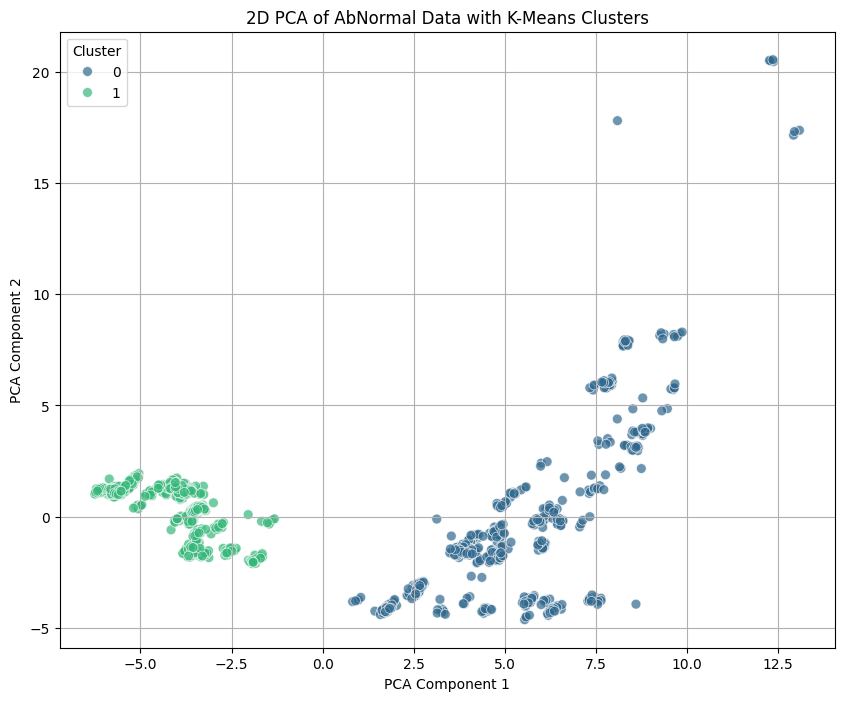

In [232]:
# 'AbNormal'인 데이터만 필터링
abnormal_data = eq1_df[eq1_df['target'] == 'AbNormal']

# 'target' 열을 제외한 나머지 열들만 선택
X = abnormal_data.drop('target', axis=1)

# 데이터 전처리 (스케일링)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA를 사용하여 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 최적의 군집 개수 찾기 (엘보우 방법)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
abnormal_data['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA 결과를 데이터프레임에 추가
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = abnormal_data['Cluster'].values

# 2차원 플롯으로 군집 결과 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50, alpha=0.7)
plt.title('2D PCA of AbNormal Data with K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [233]:
# 각 주성분에 대한 원래 변수의 로딩을 확인
pca_loadings = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=X.columns)

# PCA1에 대한 로딩의 절대값 기준으로 정렬
pca1_loadings = pca_loadings['PCA1'].abs().sort_values(ascending=False)

# 결과 출력
print("PCA1에 가장 큰 영향을 미치는 열들:")
print(pca1_loadings.head(10))

PCA1에 가장 큰 영향을 미치는 열들:
Stage2 Line2 Distance Speed Collect Result_Dam              0.178738
Stage2 Circle1 Distance Speed Collect Result_Dam            0.178733
Stage2 Line1 Distance Speed Collect Result_Dam              0.178572
Stage2 Line3 Distance Speed Collect Result_Dam              0.178566
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam         0.177474
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam    0.175518
Stage1 Line3 Distance Speed Collect Result_Dam              0.175234
Stage3 Circle1 Distance Speed Collect Result_Dam            0.174902
Stage1 Circle1 Distance Speed Collect Result_Dam            0.174828
Machine Tact time Collect Result_Fill1                      0.174377
Name: PCA1, dtype: float64


c:\Users\my pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\my pc\AppData\Local\Temp\ipykernel_21564\1117413766.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnormal_data['Cluster'] = kmeans.fit_predict(X_scaled)


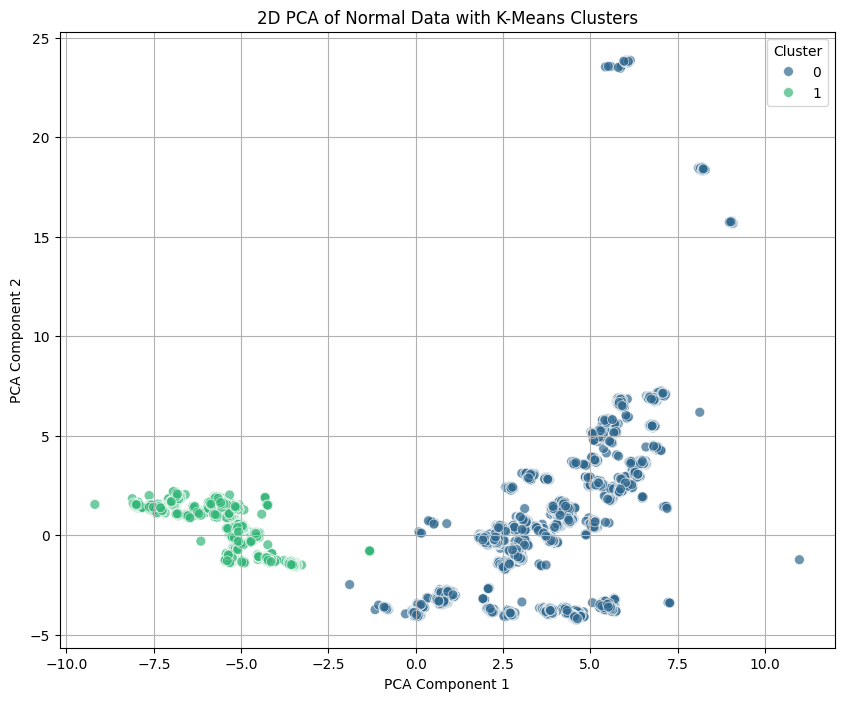

In [234]:
# 'AbNormal'인 데이터만 필터링
abnormal_data = eq1_df[eq1_df['target'] == 'Normal']

# 'target' 열을 제외한 나머지 열들만 선택
X = abnormal_data.drop('target', axis=1)

# 데이터 전처리 (스케일링)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA를 사용하여 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 최적의 군집 개수 찾기 (엘보우 방법)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
abnormal_data['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA 결과를 데이터프레임에 추가
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = abnormal_data['Cluster'].values

# 2차원 플롯으로 군집 결과 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50, alpha=0.7)
plt.title('2D PCA of Normal Data with K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [235]:
# 각 주성분에 대한 원래 변수의 로딩을 확인
pca_loadings = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=X.columns)

# PCA1에 대한 로딩의 절대값 기준으로 정렬
pca1_loadings = pca_loadings['PCA1'].abs().sort_values(ascending=False)

# 결과 출력
print("PCA1에 가장 큰 영향을 미치는 열들:")
print(pca1_loadings.head(10))

PCA1에 가장 큰 영향을 미치는 열들:
Stage2 Line2 Distance Speed Collect Result_Dam         0.191930
Stage2 Circle1 Distance Speed Collect Result_Dam       0.191929
Stage2 Line1 Distance Speed Collect Result_Dam         0.191511
Stage2 Line3 Distance Speed Collect Result_Dam         0.191506
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam    0.182218
Stage1 Line3 Distance Speed Collect Result_Dam         0.181449
Stage3 Circle1 Distance Speed Collect Result_Dam       0.180556
Stage1 Circle1 Distance Speed Collect Result_Dam       0.180476
Stage3 Line1 Distance Speed Collect Result_Dam         0.180323
Stage1 Line1 Distance Speed Collect Result_Dam         0.180242
Name: PCA1, dtype: float64


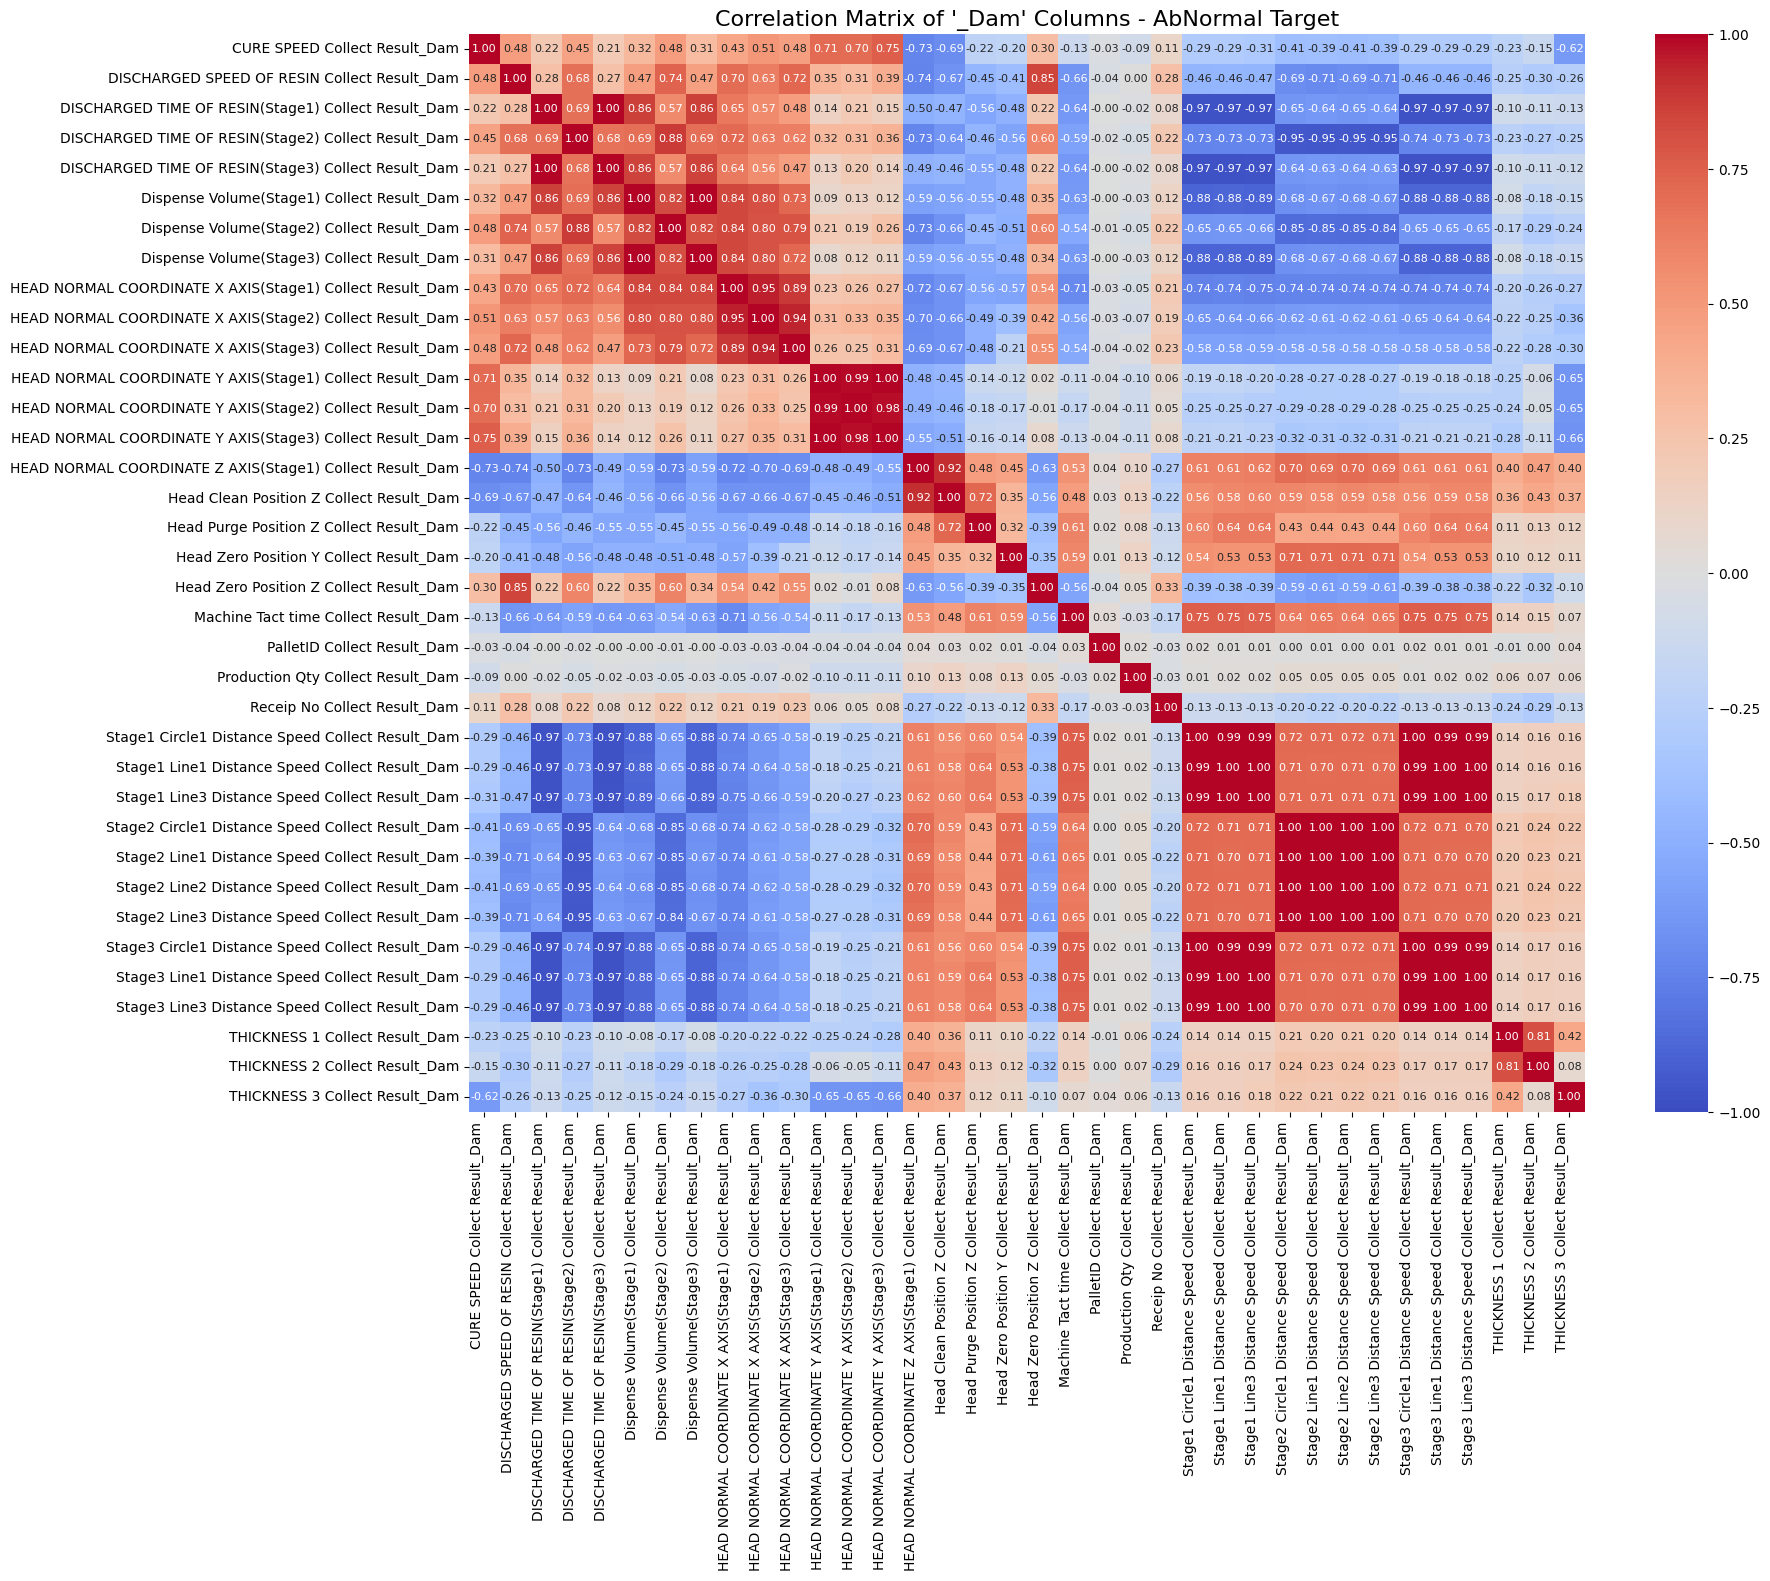

In [236]:
# 'target' 열이 'AbNormal'인 데이터만 필터링
normal_df = eq1_df[eq1_df['target'] == 'AbNormal'].copy()

# '_Dam'이 포함된 열들을 선택
dam_columns = [col for col in normal_df.columns if '_Dam' in col]
dam_df = normal_df[dam_columns]

# 상관관계 계산
correlation_matrix = dam_df.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(18, 14))  # 그래프 크기 조정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, annot_kws={"size": 8})  # 글자 크기 조정
plt.xticks(ha='right', fontsize=10)  # x축 글자 회전 및 크기 조정
plt.yticks(fontsize=10)  # y축 글자 크기 조정
plt.title("Correlation Matrix of '_Dam' Columns - AbNormal Target", fontsize=16)
plt.show()

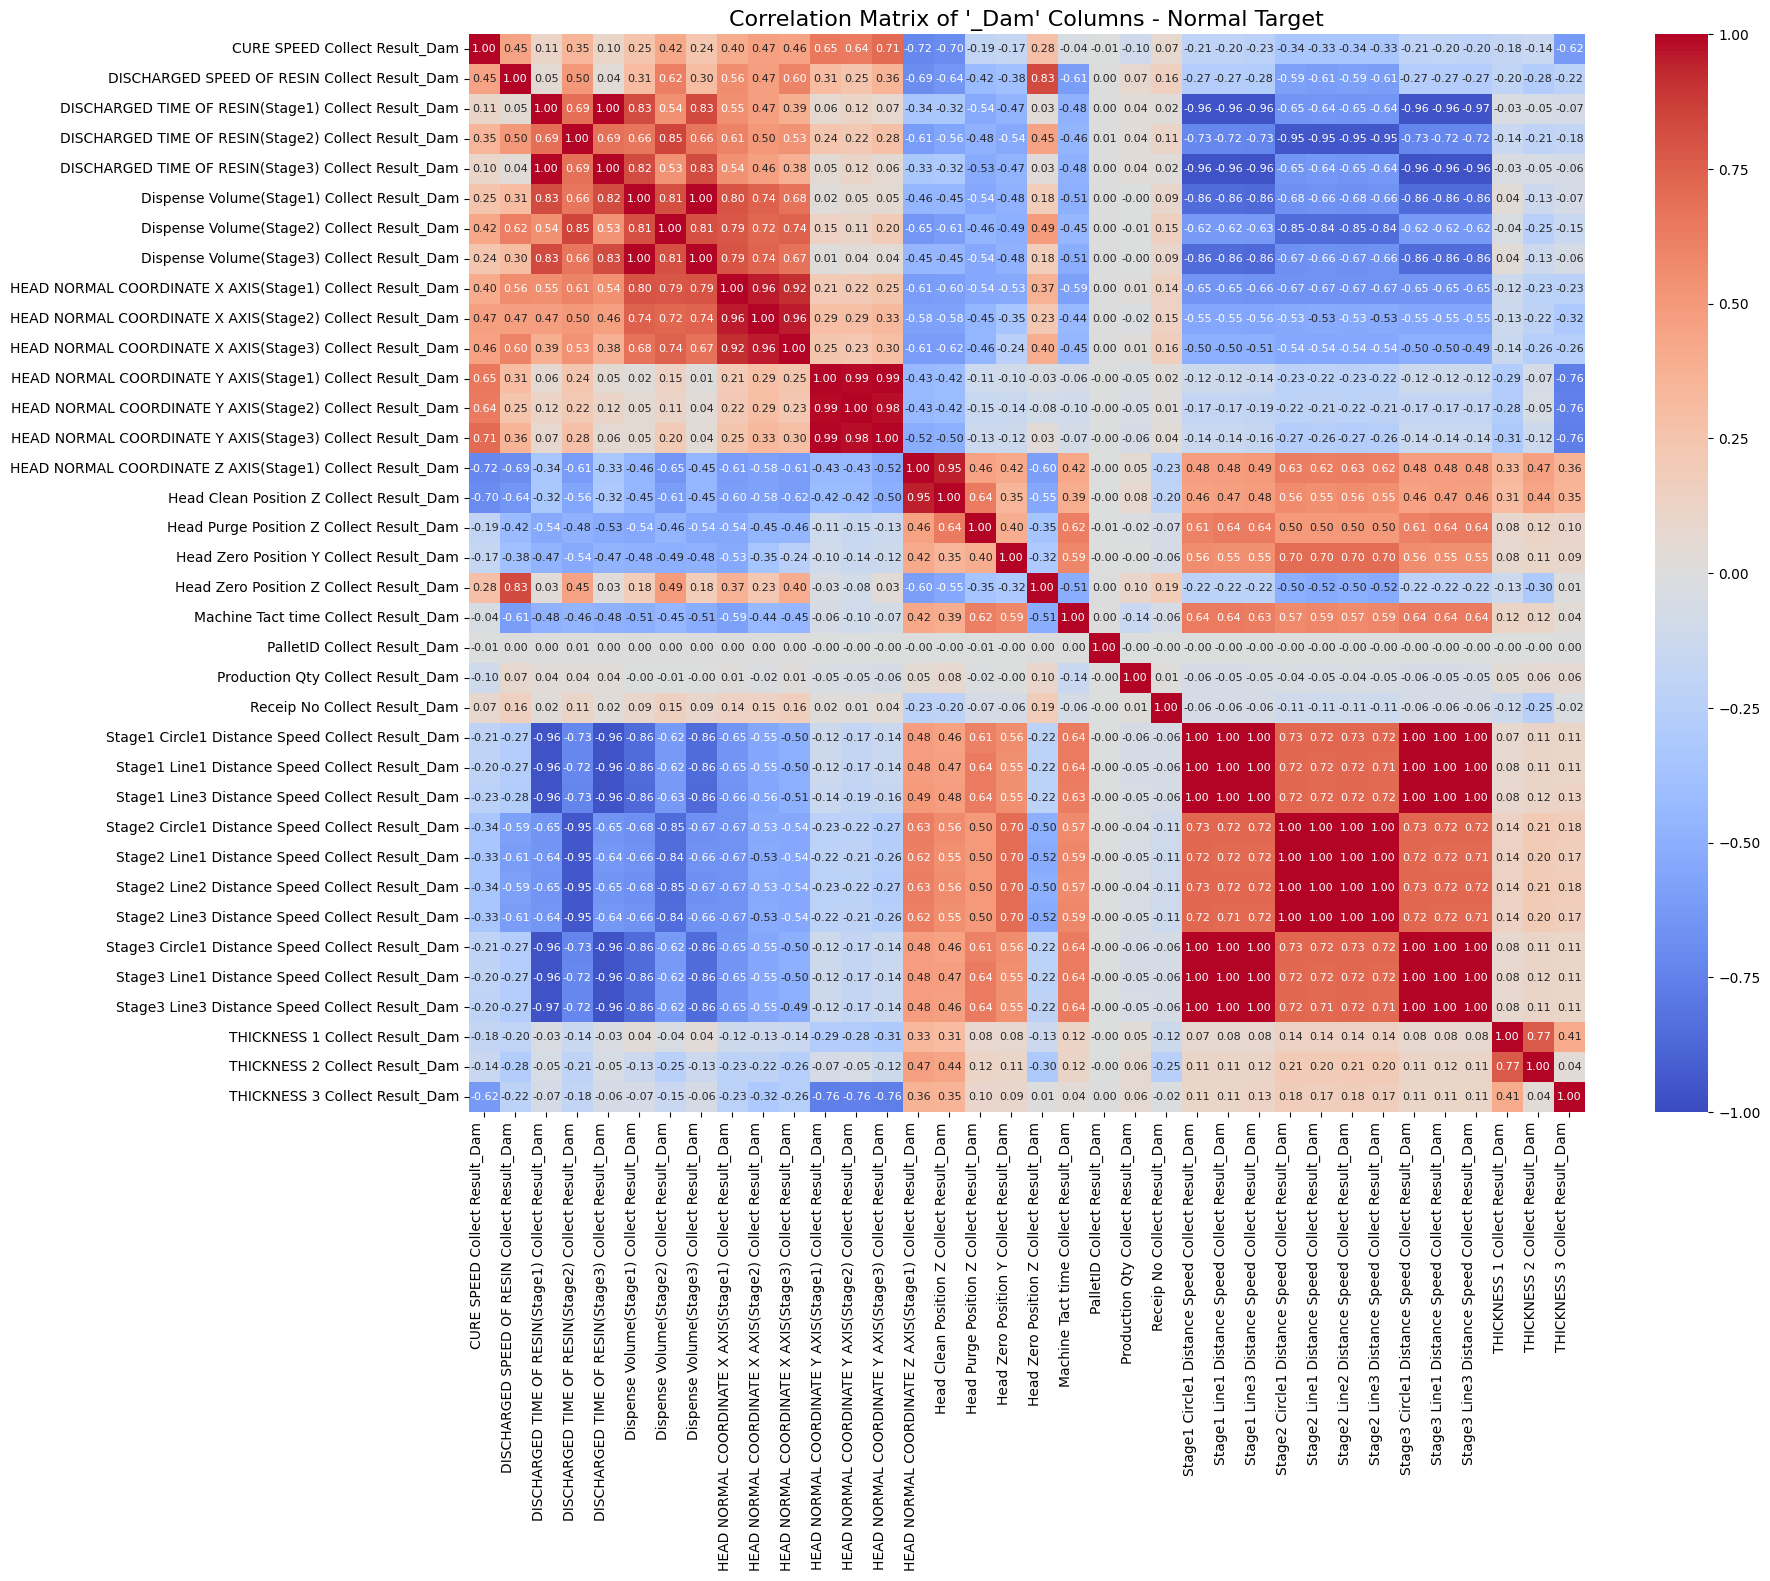

In [237]:
# 'target' 열이 'Normal'인 데이터만 필터링
normal_df = eq1_df[eq1_df['target'] == 'Normal'].copy()

# '_Dam'이 포함된 열들을 선택
dam_columns = [col for col in normal_df.columns if '_Dam' in col]
dam_df = normal_df[dam_columns]

# 상관관계 계산
correlation_matrix = dam_df.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(18, 14))  # 그래프 크기 조정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, annot_kws={"size": 8})  # 글자 크기 조정
plt.xticks(ha='right', fontsize=10)  # x축 글자 회전 및 크기 조정
plt.yticks(fontsize=10)  # y축 글자 크기 조정
plt.title("Correlation Matrix of '_Dam' Columns - Normal Target", fontsize=16)
plt.show()